In [1]:
# Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scr.utils import title_labels,gradienteDescendente,plot_3d

plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# Importando os Dados Utilizados
caminhoData2 = r'data/raw/arquivos/data2.txt'
dadosImoveis = pd.read_csv(caminhoData2,names=['TamanhoCasa','NumeroQuartos','PrecoCasa'])
dadosImoveis.head()

,TamanhoCasa,NumeroQuartos,PrecoCasa
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Normalizando os Dados
dadosImoveis['TamanhoCasa'] = (dadosImoveis['TamanhoCasa']-dadosImoveis['TamanhoCasa'].mean())/dadosImoveis['TamanhoCasa'].std()
dadosImoveis['NumeroQuartos'] = (dadosImoveis['NumeroQuartos']-dadosImoveis['NumeroQuartos'].mean())/dadosImoveis['NumeroQuartos'].std()
dadosImoveis['PrecoCasa'] = (dadosImoveis['PrecoCasa']-dadosImoveis['PrecoCasa'].mean())/dadosImoveis['PrecoCasa'].std()

dadosImoveis.head()

,TamanhoCasa,NumeroQuartos,PrecoCasa
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


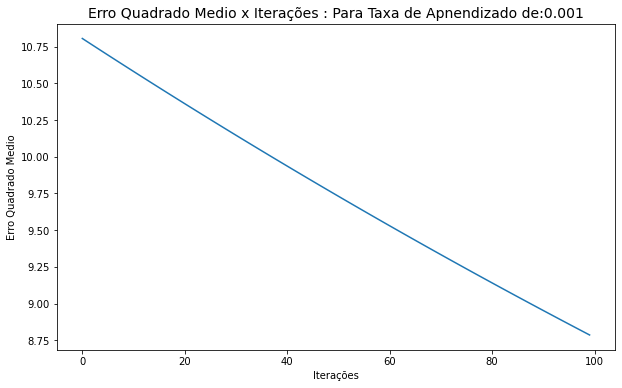

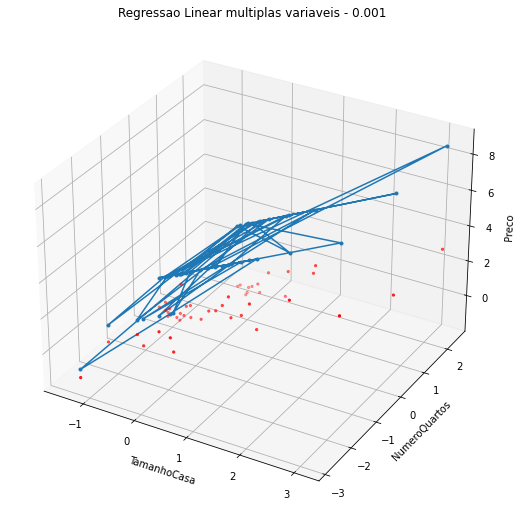

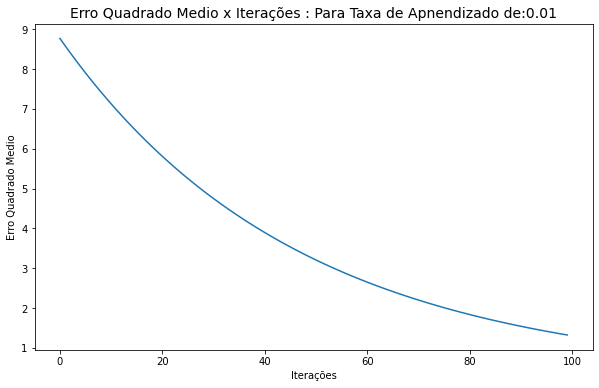

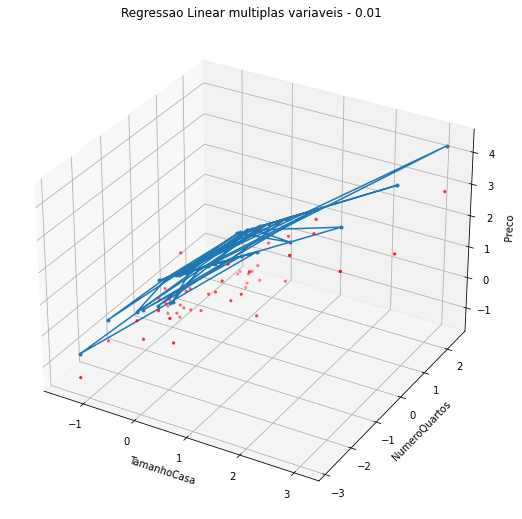

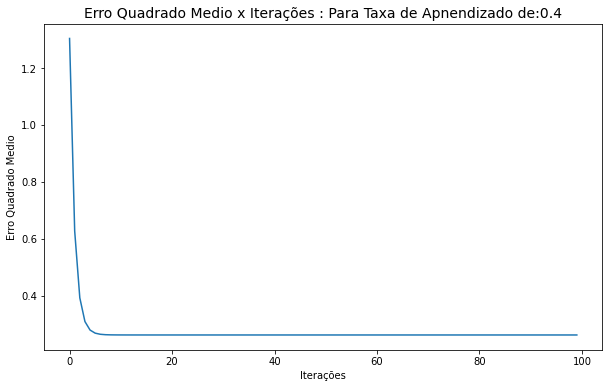

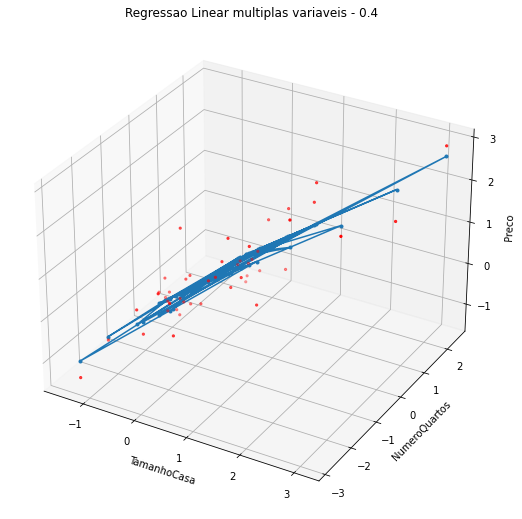

In [11]:
# Gerando as equações Linear e Plotando os Gráficos
features = dadosImoveis.loc[:,:'NumeroQuartos']
target = dadosImoveis.drop(features,axis=1)
thetas = [3,1.5,0.75]

taxasAprendizado = [0.001, 0.01, 0.4]
for taxaAprendizado in taxasAprendizado: 
    thetas,erroQuadradoMedio = gradienteDescendente(features,target['PrecoCasa'],thetas,100,taxaAprendizado=taxaAprendizado)
    # Plot do Erro quadrado Médio
    plt.plot(list(range(0,len(erroQuadradoMedio))),erroQuadradoMedio)
    title_labels(f'Erro Quadrado Medio x Iterações : Para Taxa de Apnendizado de:{taxaAprendizado}',14,'Iterações','Erro Quadrado Medio')
    plt.show()
    plot_3d(features,target,thetas,taxaAprendizado)
